In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
num_frames = 100
timestep = 0.05
# t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
t_vals = np.linspace(0.0, (num_frames)*timestep, num_frames+1)
t_vals = t_vals[1:]

# s_vals = np.linspace(0.2, 20.0, 1001)
s_vals = np.linspace(0.2, 20.0, 101)
s_vals = s_vals[:-1]
# s_vals = np.linspace(0, 100, 101)
# s_vals[0] = 1e-10
# s_vals = s_vals[:-1]
# print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

$u(s, r) = \frac{1}{2s}\sqrt{\frac{s^{\alpha}}{D}} e^{-r \sqrt{\frac{s^{\alpha}}{D}}}$

In [26]:
alpha0 = 0.5
d0 = 2.0

In [27]:
u_test = np.zeros((s_vals.shape[0], r_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(r_vals.shape[0]):
        val = np.sqrt(s_vals[i]**(alpha0)/d0)
        u_test[i, j] = (1/(2*s_vals[i])) * val * np.exp(-r_vals[j]*val)
# print(u_test)

u_test = u_test / np.trapz(u_test, r_vals, axis=1).reshape(-1, 1)


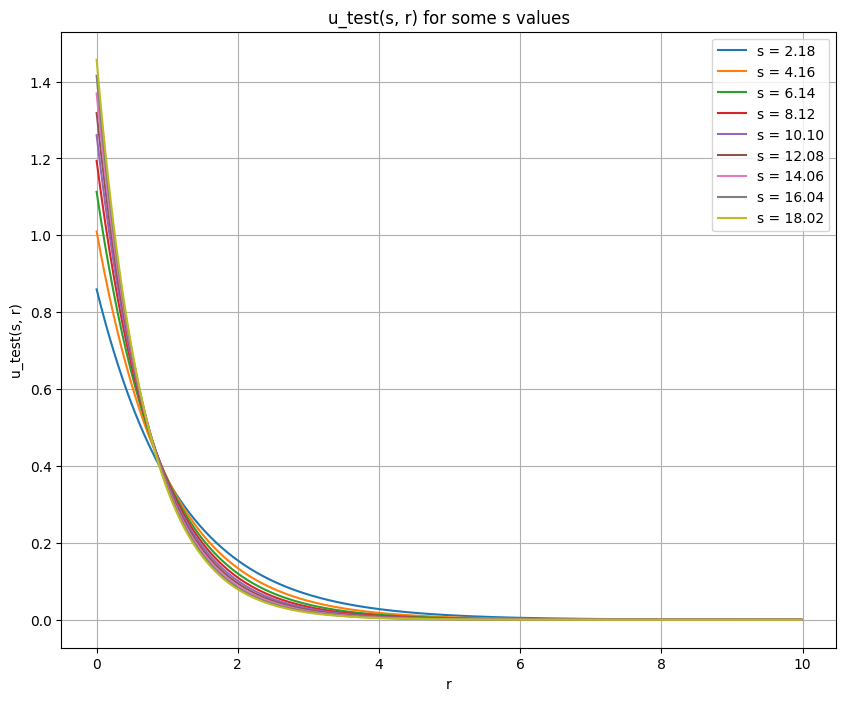

In [28]:
# plot u_test
# plot the u_pred(s, r) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_test(s, r) for some s values")
plt.xlabel("r")
plt.ylabel("u_test(s, r)")
plt.grid()
# plt.ylim(0)
for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.plot(r_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [29]:
# load u.txt and compare with u_test
u = np.loadtxt("u.txt")
print(u.shape)

(100, 500)


average difference for s = 2.18 : 0.046259984990058865


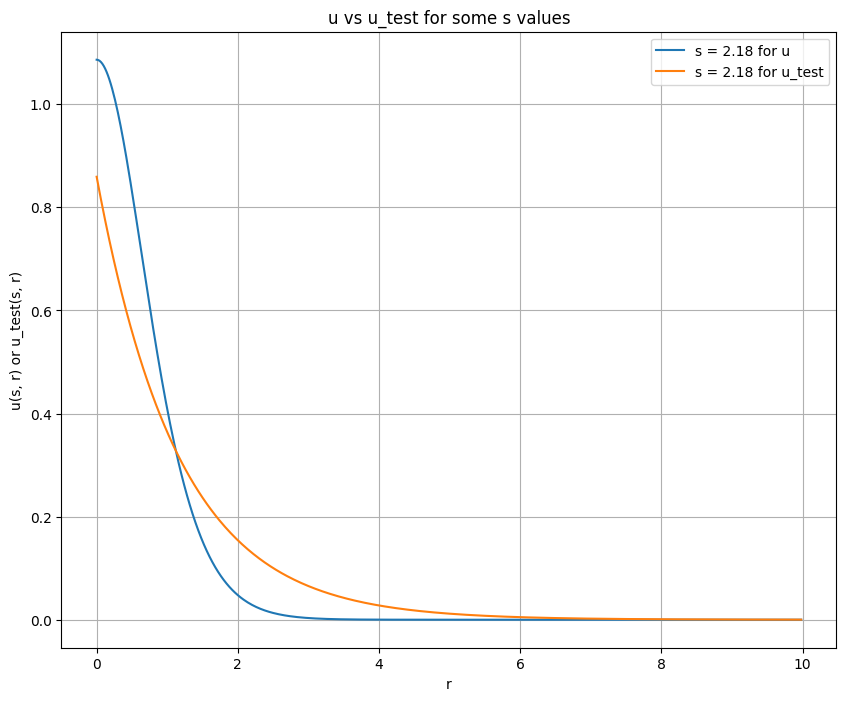

average difference for s = 4.16 : 0.04431953223089904


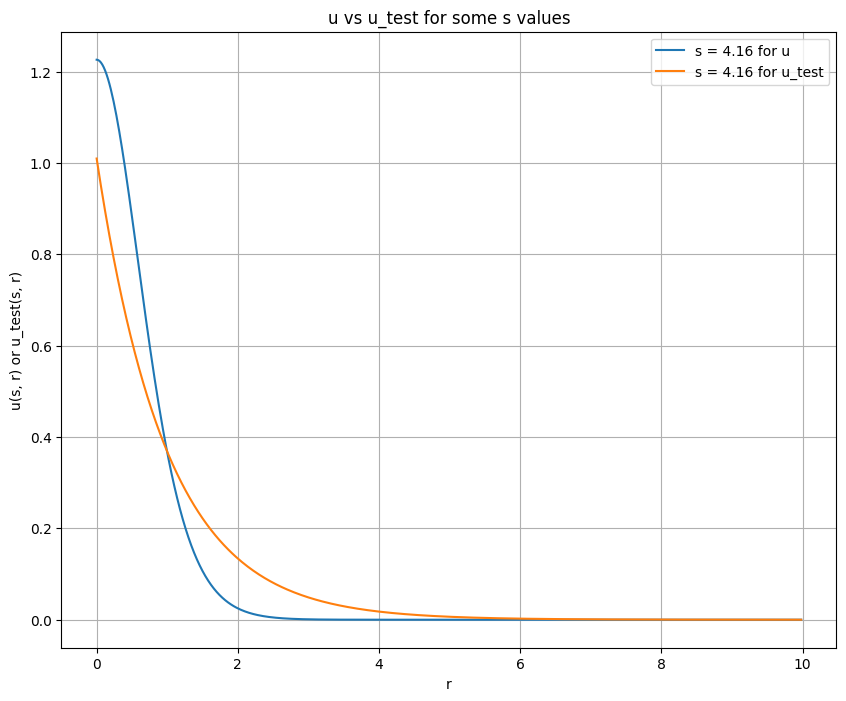

average difference for s = 6.14 : 0.04268951944327828


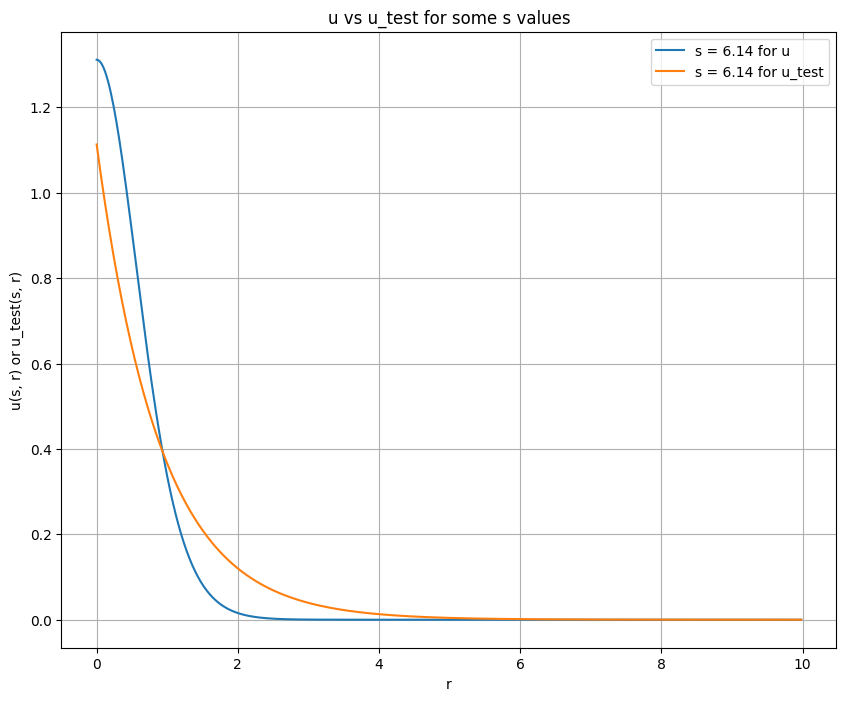

average difference for s = 8.12 : 0.04129579724484703


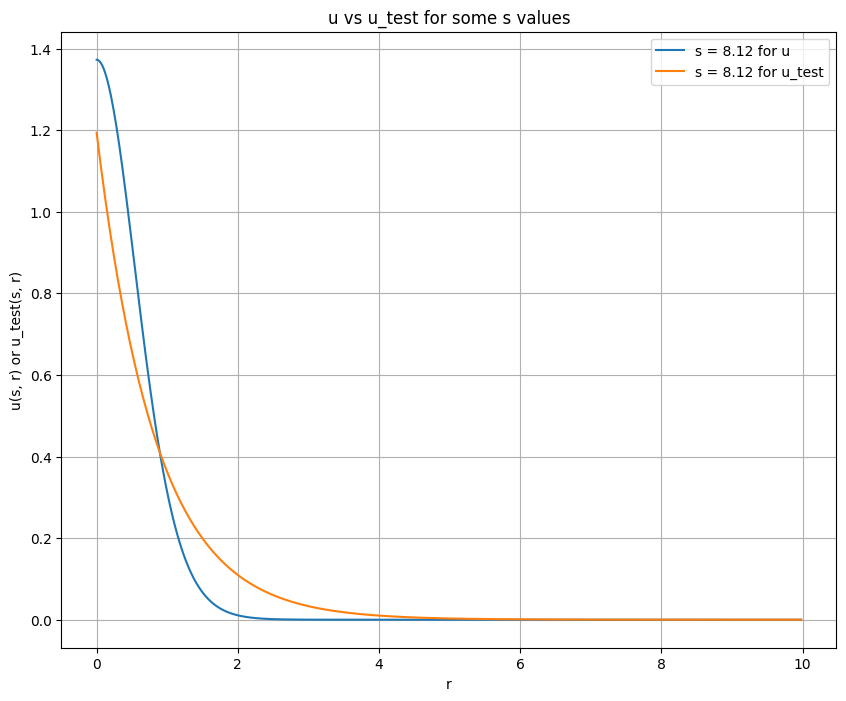

average difference for s = 10.10 : 0.04008252902533011


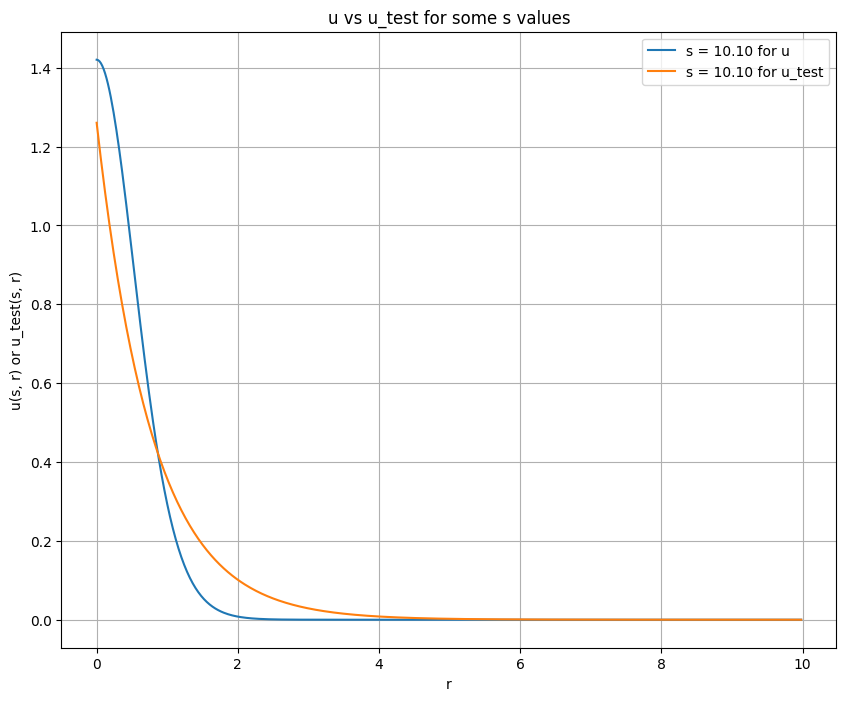

average difference for s = 12.08 : 0.03900706792089935


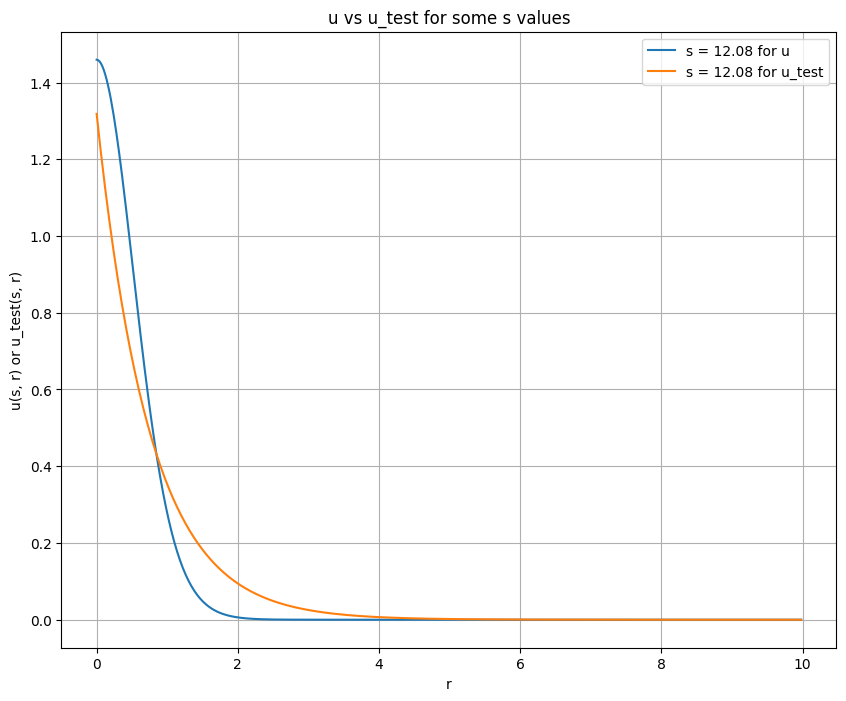

average difference for s = 14.06 : 0.03804294601717051


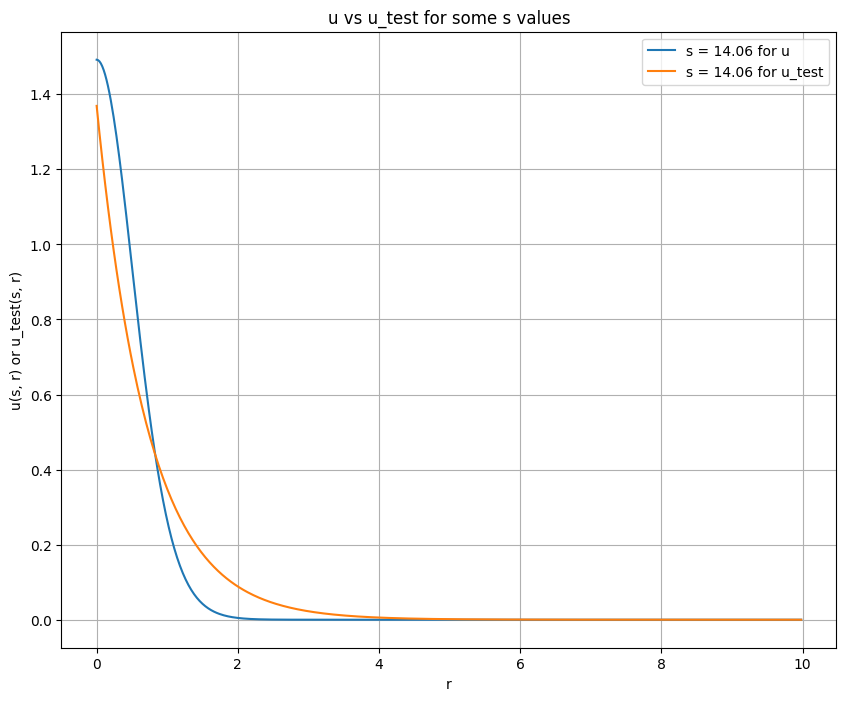

average difference for s = 16.04 : 0.03716391863969818


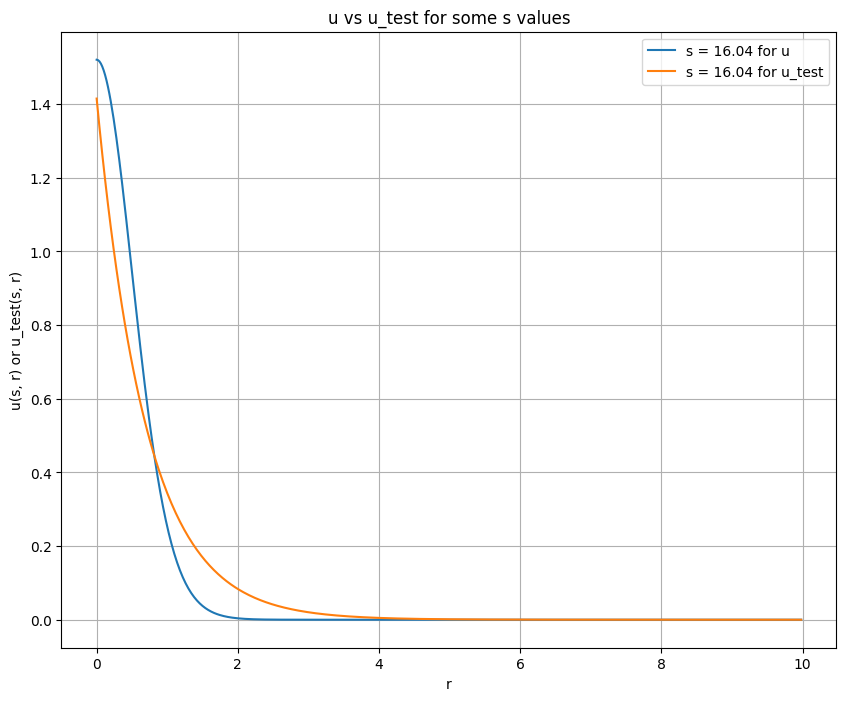

average difference for s = 18.02 : 0.03636095303228733


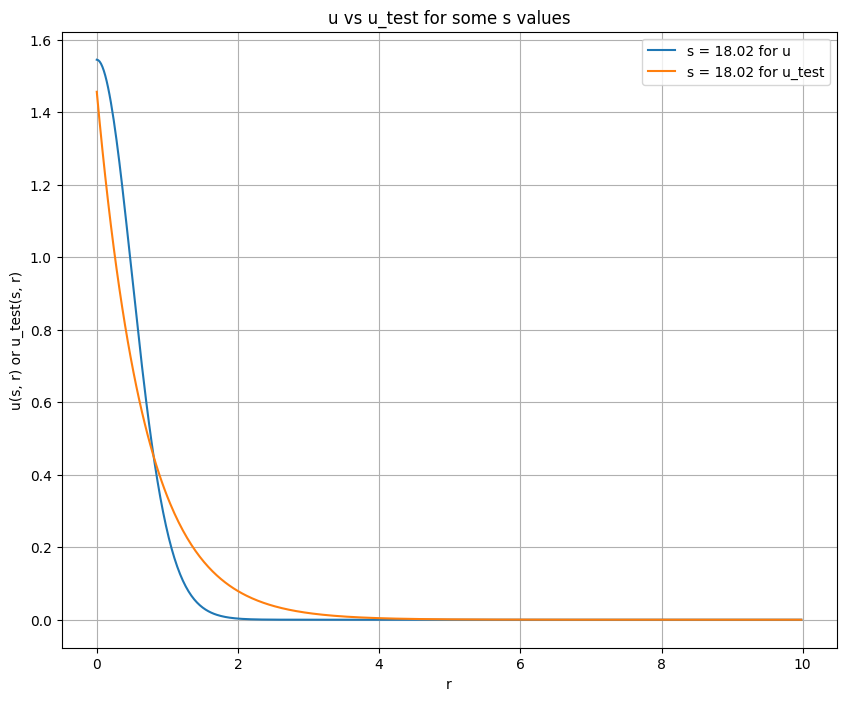

In [30]:
# compare u and u_test

for i in range(0, s_vals.shape[0], s_vals.shape[0]//10):
    if i == 0:
        continue
    plt.figure(figsize=(10, 8))
    plt.title("u vs u_test for some s values")
    plt.xlabel("r")
    plt.ylabel("u(s, r) or u_test(s, r)")
    # plt.ylim(0)
    plt.grid()
    plt.plot(r_vals, u[i, :], label=f"s = {s_vals[i]:.2f} for u")
    plt.plot(r_vals, u_test[i, :], label=f"s = {s_vals[i]:.2f} for u_test")
    print(f"average difference for s = {s_vals[i]:.2f} : {np.mean(np.abs(u[i, :]-u_test[i, :]))}")
    plt.legend()
    plt.show()

# plt.legend()
# plt.show()